Import sqlalchemy and pandas.

In [184]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import datetime
import pandas as pd
import numpy as np

In [185]:
mta_df = pd.read_csv('mta_df_for_univ.csv')
unv_df = pd.read_csv('tech_univ.csv')

Do some plotting to examine the data.

In [186]:
mta_df['DATE_TIME']= pd.to_datetime(mta_df['DATE']+mta_df['TIME'], format = "%m/%d/%Y%H:%M:%S")
mta_df.dtypes
mta_df['Day'] = mta_df['DATE_TIME'].dt.day_name()
mta_df

,CA,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,index,D_ENTRIES,D_EXITS,%D_ENTRIES,%D_EXITS,TRAFFIC,Day
0,A030,R083,01-00-00,23 ST,08/25/2018,04:00:00,REGULAR,6785929,4344280,2018-08-25 04:00:00,15.0,45.0,20.0,NaN,NaN,65.0,Saturday
1,A030,R083,01-00-00,23 ST,08/25/2018,08:00:00,REGULAR,6785958,4344341,2018-08-25 08:00:00,15.0,29.0,61.0,-0.355556,2.050000,90.0,Saturday
2,A030,R083,01-00-00,23 ST,08/25/2018,12:00:00,REGULAR,6786087,4344519,2018-08-25 12:00:00,15.0,129.0,178.0,3.448276,1.918033,307.0,Saturday
3,A030,R083,01-00-00,23 ST,08/25/2018,16:00:00,REGULAR,6786423,4344745,2018-08-25 16:00:00,15.0,336.0,226.0,1.604651,0.269663,562.0,Saturday
4,A030,R083,01-00-00,23 ST,08/25/2018,20:00:00,REGULAR,6786839,4344894,2018-08-25 20:00:00,15.0,416.0,149.0,0.238095,-0.340708,565.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151404,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,04:00:00,REGULAR,4460256,5614634,2018-11-30 04:00:00,60.0,0.0,1.0,-1.000000,-0.966667,1.0,Friday
151405,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,08:00:00,REGULAR,4460408,5614664,2018-11-30 08:00:00,60.0,152.0,30.0,inf,29.000000,182.0,Friday
151406,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,12:00:00,REGULAR,4460560,5614737,2018-11-30 12:00:00,60.0,152.0,73.0,0.000000,1.433333,225.0,Friday
151407,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,16:00:00,REGULAR,4460604,5614807,2018-11-30 16:00:00,60.0,44.0,70.0,-0.710526,-0.041096,114.0,Friday


In [187]:
Time1 = '00:00:00'
Time2 = '04:00:00'
Time3 = '08:00:00'
Time4 = '12:00:00'
Time5 = '16:00:00'
Time6 = '20:00:00'
Time7 = '23:59:99'
mta_df['DAY_ORDER'] = (mta_df['Day']=='Monday')+2*(mta_df['Day']=='Tuesday')+3*(mta_df['Day']=='Wednesday')+4*(mta_df['Day']=='Thursday')+5*(mta_df['Day']=='Friday')+6*(mta_df['Day']=='Saturday')+7*(mta_df['Day']=='Sunday')
mta_df

,CA,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,index,D_ENTRIES,D_EXITS,%D_ENTRIES,%D_EXITS,TRAFFIC,Day,DAY_ORDER
0,A030,R083,01-00-00,23 ST,08/25/2018,04:00:00,REGULAR,6785929,4344280,2018-08-25 04:00:00,15.0,45.0,20.0,NaN,NaN,65.0,Saturday,6
1,A030,R083,01-00-00,23 ST,08/25/2018,08:00:00,REGULAR,6785958,4344341,2018-08-25 08:00:00,15.0,29.0,61.0,-0.355556,2.050000,90.0,Saturday,6
2,A030,R083,01-00-00,23 ST,08/25/2018,12:00:00,REGULAR,6786087,4344519,2018-08-25 12:00:00,15.0,129.0,178.0,3.448276,1.918033,307.0,Saturday,6
3,A030,R083,01-00-00,23 ST,08/25/2018,16:00:00,REGULAR,6786423,4344745,2018-08-25 16:00:00,15.0,336.0,226.0,1.604651,0.269663,562.0,Saturday,6
4,A030,R083,01-00-00,23 ST,08/25/2018,20:00:00,REGULAR,6786839,4344894,2018-08-25 20:00:00,15.0,416.0,149.0,0.238095,-0.340708,565.0,Saturday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151404,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,04:00:00,REGULAR,4460256,5614634,2018-11-30 04:00:00,60.0,0.0,1.0,-1.000000,-0.966667,1.0,Friday,5
151405,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,08:00:00,REGULAR,4460408,5614664,2018-11-30 08:00:00,60.0,152.0,30.0,inf,29.000000,182.0,Friday,5
151406,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,12:00:00,REGULAR,4460560,5614737,2018-11-30 12:00:00,60.0,152.0,73.0,0.000000,1.433333,225.0,Friday,5
151407,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,16:00:00,REGULAR,4460604,5614807,2018-11-30 16:00:00,60.0,44.0,70.0,-0.710526,-0.041096,114.0,Friday,5


In [188]:
Time1 = '00:00:00'
Time2 = '04:00:00'
Time3 = '08:00:00'
Time4 = '12:00:00'
Time5 = '16:00:00'
Time6 = '20:00:00'
Time7 = '23:59:99'
mta_df['SHIFT'] = ((mta_df['TIME']>=Time1) & (mta_df['TIME']< Time2)) + 2*((mta_df['TIME']>=Time2) & (mta_df['TIME']< Time3)) + 3*((mta_df['TIME']>=Time3) & (mta_df['TIME']< Time4)) + 4*((mta_df['TIME']>=Time4) & (mta_df['TIME']< Time5)) + 5*((mta_df['TIME']>=Time5) & (mta_df['TIME']< Time6)) + 6*((mta_df['TIME']>=Time6) & (mta_df['TIME']<= Time7))
mta_df

,CA,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,index,D_ENTRIES,D_EXITS,%D_ENTRIES,%D_EXITS,TRAFFIC,Day,DAY_ORDER,SHIFT
0,A030,R083,01-00-00,23 ST,08/25/2018,04:00:00,REGULAR,6785929,4344280,2018-08-25 04:00:00,15.0,45.0,20.0,NaN,NaN,65.0,Saturday,6,2
1,A030,R083,01-00-00,23 ST,08/25/2018,08:00:00,REGULAR,6785958,4344341,2018-08-25 08:00:00,15.0,29.0,61.0,-0.355556,2.050000,90.0,Saturday,6,3
2,A030,R083,01-00-00,23 ST,08/25/2018,12:00:00,REGULAR,6786087,4344519,2018-08-25 12:00:00,15.0,129.0,178.0,3.448276,1.918033,307.0,Saturday,6,4
3,A030,R083,01-00-00,23 ST,08/25/2018,16:00:00,REGULAR,6786423,4344745,2018-08-25 16:00:00,15.0,336.0,226.0,1.604651,0.269663,562.0,Saturday,6,5
4,A030,R083,01-00-00,23 ST,08/25/2018,20:00:00,REGULAR,6786839,4344894,2018-08-25 20:00:00,15.0,416.0,149.0,0.238095,-0.340708,565.0,Saturday,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151404,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,04:00:00,REGULAR,4460256,5614634,2018-11-30 04:00:00,60.0,0.0,1.0,-1.000000,-0.966667,1.0,Friday,5,2
151405,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,08:00:00,REGULAR,4460408,5614664,2018-11-30 08:00:00,60.0,152.0,30.0,inf,29.000000,182.0,Friday,5,3
151406,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,12:00:00,REGULAR,4460560,5614737,2018-11-30 12:00:00,60.0,152.0,73.0,0.000000,1.433333,225.0,Friday,5,4
151407,R647,R110,02-06-00,FLATBUSH AV-B.C,11/30/2018,16:00:00,REGULAR,4460604,5614807,2018-11-30 16:00:00,60.0,44.0,70.0,-0.710526,-0.041096,114.0,Friday,5,5


In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

Average daily by station.

In [190]:
station_traffic = mta_df.groupby(['STATION']).TRAFFIC.mean().reset_index().sort_values('TRAFFIC', ascending=False)
station_traffic

,STATION,TRAFFIC
11,W 4 ST-WASH SQ,634.669979
0,116 ST-COLUMBIA,595.337377
2,23 ST,427.586458
4,ASTOR PL,417.750217
9,KEW GARDENS,362.812994
8,JAY ST-METROTEC,266.784656
5,BEDFORD PK BLVD,258.537300
3,6 AV,242.285763
10,KINGSBRIDGE RD,234.455954
6,FLATBUSH AV-B.C,227.678060


Big variation in 135, 23, JaySt stations.

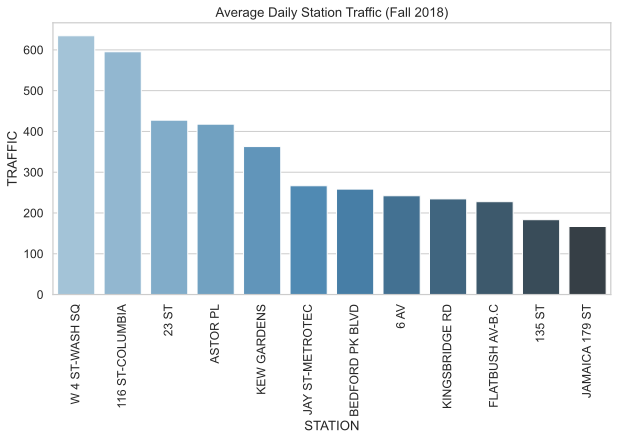

In [194]:
plt.figure(figsize=[10,5])
plt.title('Average Daily Station Traffic (Fall 2018)')
plt.xticks(rotation='vertical')

sns.barplot(x='STATION',y='TRAFFIC',data=station_traffic, palette='Blues_d'); 
plt.savefig('avg_daily_unv.png', bbox_inches="tight")

By individual station location

By individual station over time.

In [192]:
mask4 = mta_df['STATION'] == 'JAMAICA 179 ST'
# stn_view = mta_df_daily[mask4].groupby(['UNIT']).TRAFFIC.sum().reset_index()
stn_view = mta_df[mask4].groupby(['DAY_ORDER','SHIFT']).TRAFFIC.mean().reset_index()
# stn_view

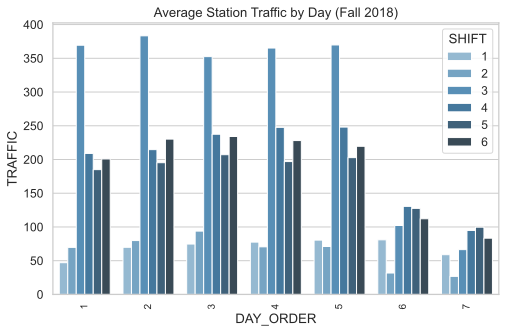

In [193]:
plt.figure(figsize=[8,5])
plt.title('Average Station Traffic by Day (Fall 2018)')
# plt.xticks(ticks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],rotation='vertical', fontsize='10')
ticks_x = np.linspace(0, 3, 7)
# months = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks_x, labels=('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), rotation='vertical', fontsize='10');
plt.legend
sns.barplot(x='DAY_ORDER',y='TRAFFIC',hue='SHIFT',data=stn_view,palette='Blues_d'); 
plt.savefig('JAMAICA 179 ST', bbox_inches="tight") 